In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import random
import tensorflow.keras as K
from tensorflow.keras.callbacks import EarlyStopping
import os

prod = pd.read_csv('data/well production.csv')

In [2]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,180.0,211.0,277.0,338.0,397.0,445.0,547.0,562.0,639.0,668.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,22.0,27.0,75.0,74.0,59.0,90.0,124.0,119.0,126.0,157.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,15.0,15.0,31.0,30.0,33.0,31.0,20.0,49.0,30.0,41.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,9.0,13.0,78.0,86.0,119.0,134.0,139.0,162.0,136.0,183.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
5,Sundae 1-129H,33329619,0.083232,1.6,62.0,77.0,91.0,86.0,49.0,53.0,...,0.0,0.0,28.0,23.0,31.0,16.0,18.0,11.0,16.0,27.0
6,State 3-95H,36312036,0.100918,1.6,320.0,321.0,310.0,281.0,269.0,217.0,...,34.0,63.0,76.0,128.0,136.0,124.0,148.0,157.0,210.0,244.0
7,Tribal 11-185H,36401846,0.098612,1.6,168.0,172.0,168.0,147.0,115.0,130.0,...,31.0,52.0,84.0,68.0,50.0,79.0,89.0,94.0,123.0,114.0
8,Laramie 14-76H,36788594,0.091098,1.6,213.0,229.0,217.0,190.0,147.0,157.0,...,42.0,69.0,111.0,101.0,95.0,151.0,105.0,167.0,162.0,174.0
9,Federal 12-111H,32031850,0.085051,1.6,88.0,108.0,78.0,113.0,96.0,101.0,...,18.0,0.0,-0.0,0.0,40.0,0.0,0.0,63.0,23.0,54.0


In [3]:
oil = prod.filter(regex="oil.*")

In [4]:
oil

,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,oil 7,oil 8,oil 9,oil 10,oil 11,oil 12
0,862.0,824.0,759.0,728.0,661.0,601.0,542.0,493.0,392.0,376.0,299.0,271.0
1,228.0,249.0,214.0,210.0,161.0,163.0,178.0,147.0,112.0,117.0,110.0,79.0
2,67.0,85.0,73.0,73.0,57.0,58.0,55.0,57.0,68.0,38.0,58.0,47.0
3,256.0,242.0,267.0,263.0,199.0,191.0,158.0,142.0,137.0,115.0,141.0,93.0
4,23.0,29.0,31.0,50.0,72.0,52.0,61.0,45.0,27.0,36.0,18.0,46.0
5,62.0,77.0,91.0,86.0,49.0,53.0,46.0,61.0,58.0,65.0,60.0,49.0
6,320.0,321.0,310.0,281.0,269.0,217.0,209.0,221.0,197.0,188.0,134.0,101.0
7,168.0,172.0,168.0,147.0,115.0,130.0,149.0,120.0,110.0,105.0,76.0,85.0
8,213.0,229.0,217.0,190.0,147.0,157.0,163.0,108.0,153.0,91.0,97.0,84.0
9,88.0,108.0,78.0,113.0,96.0,101.0,56.0,100.0,95.0,32.0,72.0,41.0


In [5]:
total_oil = oil.sum(axis=1)

In [6]:
total_oil

0     6808.0
1     1968.0
2      736.0
3     2204.0
4      490.0
5      757.0
6     2768.0
7     1545.0
8     1849.0
9      980.0
10    2380.0
11    1559.0
12     649.0
13    1202.0
14     385.0
15     943.0
16    3363.0
17    2515.0
18     407.0
19    2506.0
20    2407.0
21    1065.0
22    3088.0
23    1755.0
24    1188.0
25    4481.0
26     626.0
27    2971.0
28     588.0
29    2406.0
       ...  
70    2290.0
71    2780.0
72    1405.0
73    3994.0
74    2076.0
75    1436.0
76     810.0
77     567.0
78     471.0
79     533.0
80     788.0
81    3159.0
82    1088.0
83    1491.0
84     681.0
85     843.0
86     235.0
87    1171.0
88    1236.0
89    1122.0
90    1201.0
91    1326.0
92    1037.0
93    2647.0
94    1216.0
95    7605.0
96     315.0
97    8279.0
98    2780.0
99    4355.0
Length: 100, dtype: float64

In [7]:
prod['total oil'] = total_oil

In [8]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,total oil
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,211.0,277.0,338.0,397.0,445.0,547.0,562.0,639.0,668.0,6808.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,27.0,75.0,74.0,59.0,90.0,124.0,119.0,126.0,157.0,1968.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,15.0,31.0,30.0,33.0,31.0,20.0,49.0,30.0,41.0,736.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,13.0,78.0,86.0,119.0,134.0,139.0,162.0,136.0,183.0,2204.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,490.0
5,Sundae 1-129H,33329619,0.083232,1.6,62.0,77.0,91.0,86.0,49.0,53.0,...,0.0,28.0,23.0,31.0,16.0,18.0,11.0,16.0,27.0,757.0
6,State 3-95H,36312036,0.100918,1.6,320.0,321.0,310.0,281.0,269.0,217.0,...,63.0,76.0,128.0,136.0,124.0,148.0,157.0,210.0,244.0,2768.0
7,Tribal 11-185H,36401846,0.098612,1.6,168.0,172.0,168.0,147.0,115.0,130.0,...,52.0,84.0,68.0,50.0,79.0,89.0,94.0,123.0,114.0,1545.0
8,Laramie 14-76H,36788594,0.091098,1.6,213.0,229.0,217.0,190.0,147.0,157.0,...,69.0,111.0,101.0,95.0,151.0,105.0,167.0,162.0,174.0,1849.0
9,Federal 12-111H,32031850,0.085051,1.6,88.0,108.0,78.0,113.0,96.0,101.0,...,0.0,-0.0,0.0,40.0,0.0,0.0,63.0,23.0,54.0,980.0


In [9]:
min_eastings = np.zeros(oil.shape[0])
max_eastings = np.zeros(oil.shape[0])
northings = np.zeros(oil.shape[0])

well_names = list(prod['well name'])
for _, row in prod.iterrows():
    idx = well_names.index(row['well name'])
    temp = pd.read_csv('data/' + row['well name'] + '.csv')

    min_eastings[idx] = temp['easting'].min()
    max_eastings[idx] = temp['easting'].max()
    northings[idx] = temp['northing'][0]

prod['min eastings'] = pd.Series(min_eastings)
prod['max eastings'] = pd.Series(max_eastings)
prod['northings'] = pd.Series(northings)


In [10]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 7,water 8,water 9,water 10,water 11,water 12,total oil,min eastings,max eastings,northings
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,397.0,445.0,547.0,562.0,639.0,668.0,6808.0,78000.0,85565.0,1600.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,59.0,90.0,124.0,119.0,126.0,157.0,1968.0,88400.0,98043.0,32200.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,33.0,31.0,20.0,49.0,30.0,41.0,736.0,8200.0,19163.0,200.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,119.0,134.0,139.0,162.0,136.0,183.0,2204.0,79500.0,90164.0,31000.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,7.0,0.0,490.0,5400.0,12676.0,79200.0
5,Sundae 1-129H,33329619,0.083232,1.6,62.0,77.0,91.0,86.0,49.0,53.0,...,31.0,16.0,18.0,11.0,16.0,27.0,757.0,84100.0,93471.0,70900.0
6,State 3-95H,36312036,0.100918,1.6,320.0,321.0,310.0,281.0,269.0,217.0,...,136.0,124.0,148.0,157.0,210.0,244.0,2768.0,76800.0,85948.0,23300.0
7,Tribal 11-185H,36401846,0.098612,1.6,168.0,172.0,168.0,147.0,115.0,130.0,...,50.0,79.0,89.0,94.0,123.0,114.0,1545.0,83300.0,91875.0,79600.0
8,Laramie 14-76H,36788594,0.091098,1.6,213.0,229.0,217.0,190.0,147.0,157.0,...,95.0,151.0,105.0,167.0,162.0,174.0,1849.0,35900.0,43429.0,37200.0
9,Federal 12-111H,32031850,0.085051,1.6,88.0,108.0,78.0,113.0,96.0,101.0,...,40.0,0.0,0.0,63.0,23.0,54.0,980.0,24100.0,34007.0,41000.0


In [11]:
def plot_range(x_min, x_max, y_min, y_max, res):
    slope = (y_max - y_min)/(x_max - x_min)
    interval = (x_max - x_min)/res
    x = [x_min + interval*i for i in range(res)]
    y = [y_min + slope*(x_min + interval*i) for i in range(res)]
    
    return np.array(x).flatten('F'), np.array(y).flatten('F')

[78000.   78378.25 78756.5  ... 67800.75 68065.5  68330.25]


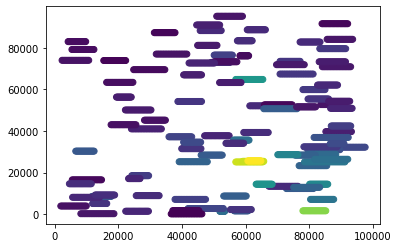

In [12]:
x, y = plot_range(prod['min eastings'], prod['max eastings'], prod['northings'], prod['northings'], 20)
print(x)
color = []
for i in prod['total oil']:
    color.append(20*[i])
plt.scatter(x, y, c=np.repeat(prod['total oil'], 20))
#plt.scatter(x, y)

In [13]:
# this one predicts total oil production from 9 features
def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(prod.loc[prod['well name'] == i[:-4]]['total oil'])
                t_oil = np.repeat(value, len(df.index))
                df['total oil'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(prod.loc[prod['well name'] == i[:-4]]['total oil'])
                t_oil = np.repeat(value, len(df.index))
                df['total oil'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
# separates our dependent variable out
    y_train = X_train.pop('total oil')
    y_test = X_test.pop('total oil')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[9,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

#info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


In [14]:
calcs = pd.read_csv('calculations.csv')
calcs

,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,average pressure (Pa),recovery factor,E prime calculation,b calculation,Area method one,Area method two,Area average,original oil in place,recoverable reserves
0,Brisket 1-204H.csv,33900.0,88867.87,4536.0,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,35023133,0.107214,1.170399e+07,122.236998,26.480535,21.071994,23.776265,2.697406e+05,28920.062343
1,Brisket 1-44H.csv,3900.0,6117.40,8435.0,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,36087449,0.072103,5.237163e+06,34.453241,13.401038,10.565269,11.983154,1.282571e+04,924.778262
2,Brisket 10-65H.csv,14400.0,83103.15,6006.0,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,36199370,0.097415,9.309136e+06,225.741373,65.789194,52.566181,59.177687,1.254164e+06,122174.025375
3,Brisket 2-149H.csv,62100.0,85911.09,6622.0,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,31397763,0.085264,1.087039e+07,82.226532,25.435261,20.122727,22.778994,1.156179e+05,9858.100072
4,Brisket 3-212H.csv,43000.0,21815.15,8230.0,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,30569755,0.079498,1.360398e+07,184.397217,71.981665,57.177338,64.579502,9.126251e+05,72551.465885
5,Brisket 6-50H.csv,83000.0,7107.31,5815.0,22.950508,0.0184,0.00169,0.094385,8.686744e+06,0.905615,0.34714,40108485,0.074804,9.876982e+06,93.197509,25.456454,20.169193,22.812823,4.230217e+04,3164.366479
6,Brisket 7-105H.csv,1700.0,41416.92,8634.0,13.828010,0.0652,0.01810,0.204789,9.297470e+06,0.795211,0.29825,33614502,0.112724,1.020526e+07,45.547265,18.167871,14.330603,16.249237,5.648750e+04,6367.477519
7,Brisket 7-212H.csv,28400.0,78851.66,6703.0,77.486494,0.0822,0.03032,0.100758,9.837799e+06,0.899242,0.30257,36122080,0.096848,1.082920e+07,258.465452,84.189233,67.292637,75.740935,2.103464e+06,203716.327034
8,Brisket 9-106H.csv,73000.0,52273.87,6148.0,44.580859,0.0470,0.00901,0.000000,1.008797e+07,1.000000,0.31142,47255446,0.092480,1.117140e+07,188.578697,55.681208,44.372677,50.026943,5.082531e+05,47003.127243
9,Burger 10-170H.csv,8900.0,29393.76,7588.0,53.395952,0.0536,0.01188,0.194624,1.015547e+07,0.805376,0.31066,36429211,0.105464,1.124026e+07,173.053987,62.321895,49.512143,55.917019,6.249502e+05,65909.604915


In [15]:
# this one predicts ooip from 9 features

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[9,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

#info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


In [16]:
# this one predicts ooip from 4

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']].reset_index()
    X_test = X_test[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']].reset_index()

# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[5,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

#info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


    easting  northing  porosity
0   80100.0   14400.0      0.08
1   80161.0   14400.0      0.09
2   80221.0   14400.0      0.09
3   80282.0   14400.0      0.09
4   80343.0   14400.0      0.09
5   80403.0   14400.0      0.08
6   80464.0   14400.0      0.07
7   80525.0   14400.0      0.07
8   80585.0   14400.0      0.09
9   80646.0   14400.0      0.09
10  80707.0   14400.0      0.06
11  80767.0   14400.0      0.07
12  80828.0   14400.0      0.07
13  80889.0   14400.0      0.09
14  80949.0   14400.0      0.09
15  81010.0   14400.0      0.10
16  81071.0   14400.0      0.08
17  81131.0   14400.0      0.08
18  81192.0   14400.0      0.11
19  81253.0   14400.0      0.09
20  81313.0   14400.0      0.09
21  81374.0   14400.0      0.08
22  81435.0   14400.0      0.08
23  81495.0   14400.0      0.05
24  81556.0   14400.0      0.06
25  81617.0   14400.0      0.06
26  81677.0   14400.0      0.09
27  81738.0   14400.0      0.09
28  81799.0   14400.0      0.08
29  81859.0   14400.0      0.07
..      

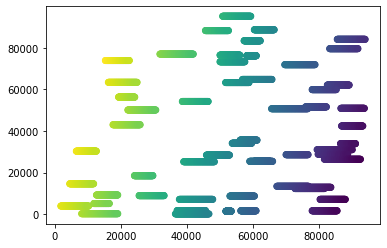

In [17]:
# Now what needs to happen is we create models for porosity and permeability in terms of easting and northing, and use that to train the dataset


def porosity_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
        
    X_train = X_train[['easting', 'northing', 'porosity']]
    X_test = X_test[['easting', 'northing', 'porosity']]

    print(X_train)
# separates our dependent variable out
    y_train = X_train.pop('porosity')
    y_test = X_test.pop('porosity')
    
    #normalize
    #X_temp = X_train.append(X_test)
    #X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    #X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    #X_train.drop('index')
    #X_test.drop('index')
    
    #y_temp = y_train.append(y_test)
    #y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    #y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[2,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model

porosity = porosity_model(optimizer, .5, 100, 10, 10, 10, 5)



Train on 4900 samples, validate on 5100 samples
Epoch 1/100
4900/4900 [==============================] - 0s 55us/sample - loss: 9968847.8655 - val_loss: 6.0686
Epoch 2/100
4900/4900 [==============================] - 0s 42us/sample - loss: 0.3264 - val_loss: 1.1621e-04
Epoch 3/100
4900/4900 [==============================] - 0s 42us/sample - loss: 8.6022e-05 - val_loss: 1.1509e-04
Epoch 4/100
4900/4900 [==============================] - 0s 43us/sample - loss: 8.6171e-05 - val_loss: 1.1438e-04
Epoch 5/100
4900/4900 [==============================] - 0s 43us/sample - loss: 8.6075e-05 - val_loss: 1.1438e-04
Epoch 6/100
4900/4900 [==============================] - 0s 42us/sample - loss: 8.6051e-05 - val_loss: 1.1563e-04
Epoch 7/100
4900/4900 [==============================] - 0s 43us/sample - loss: 8.6343e-05 - val_loss: 1.1482e-04
Epoch 8/100
4900/4900 [==============================] - 0s 42us/sample - loss: 8.6180e-05 - val_loss: 1.1541e-04
Epoch 9/100
4900/4900 [=======================

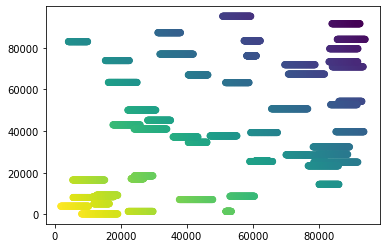

In [18]:
def permeability_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'permeability']]
    X_test = X_test[['easting', 'northing', 'permeability']]

# separates our dependent variable out
    y_train = X_train.pop('permeability')
    y_test = X_test.pop('permeability')

    #normalize
    #X_temp = X_train.append(X_test)
    #X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    #X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    #X_train.drop('index')
    #X_test.drop('index')
    
    #y_temp = y_train.append(y_test)
    #y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    #y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[2,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model

permeability = permeability_model(optimizer, .5, 100, 10, 10, 10, 5)


    easting  northing  permeability  porosity
0   86600.0   33900.0     -2.721062 -3.488374
1   86646.0   33900.0     -2.721460 -3.485606
2   86692.0   33900.0     -2.724000 -3.489466
3   86737.0   33900.0     -2.723418 -3.505015
4   86783.0   33900.0     -2.725181 -3.501062
5   86829.0   33900.0     -2.726483 -3.498295
6   86875.0   33900.0     -2.728070 -3.491621
7   86921.0   33900.0     -2.728364 -3.500924
8   86967.0   33900.0     -2.729231 -3.506321
9   87012.0   33900.0     -2.730293 -3.496543
10  87058.0   33900.0     -2.731304 -3.512474
11  87104.0   33900.0     -2.732861 -3.520240
12  87150.0   33900.0     -2.731750 -3.508123
13  87196.0   33900.0     -2.734315 -3.502986
14  87241.0   33900.0     -2.734229 -3.511554
15  87287.0   33900.0     -2.735942 -3.523579
16  87333.0   33900.0     -2.737869 -3.527439
17  87379.0   33900.0     -2.737587 -3.514490
18  87425.0   33900.0     -2.739647 -3.526162
19  87470.0   33900.0     -2.740000 -3.521827
20  87516.0   33900.0     -2.74149

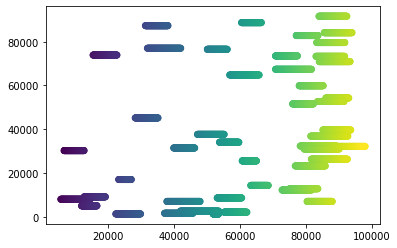

In [19]:
# this one trains on the predicted permeability and porosity from the models

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place']]
    X_train['permeability'] = permeability.predict(X_train[['easting', 'northing']])
    X_train['porosity'] = porosity.predict(X_train[['easting', 'northing']])
    
    X_test = X_test[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']]
    X_test['permeability'] = permeability.predict(X_test[['easting', 'northing']])
    X_test['porosity'] = porosity.predict(X_test[['easting', 'northing']])
    
# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    #X_temp = X_train.append(X_test)
    #_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    #X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())
    
    print(X_train)

    #y_temp = y_train.append(y_test)
    #y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    #y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[4,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


In [28]:
#Predicted porosity vaues based on easting and northing
#Easting and Northing ranges were narrowed down from previous calculations to allow for more frequent calculations

por_pred = pd.DataFrame(0.0, index=np.arange(0,15001,500), columns=np.arange(80000,97501,500))
for e in range(80000,97501,500):
    for n in range(0,15001,500):
        por_pred[e][n] = porosity.predict(np.array([np.array([e,n])]))[0][0]
print(por_pred)


          80000     80500     81000     81500     82000     82500     83000  \
0     -3.552412 -3.579756 -3.595381 -3.607100 -3.642256 -3.669600 -3.689131   
500   -3.540694 -3.568037 -3.591475 -3.622725 -3.630537 -3.657881 -3.685225   
1000  -3.552412 -3.560225 -3.587569 -3.607100 -3.626631 -3.657881 -3.681319   
1500  -3.540694 -3.552412 -3.583662 -3.607100 -3.634444 -3.653975 -3.661787   
2000  -3.528975 -3.544600 -3.579756 -3.591475 -3.614912 -3.638350 -3.657881   
2500  -3.521162 -3.544600 -3.564131 -3.587569 -3.614912 -3.638350 -3.661787   
3000  -3.517256 -3.540694 -3.560225 -3.583662 -3.611006 -3.630537 -3.650069   
3500  -3.513350 -3.540694 -3.556319 -3.595381 -3.614912 -3.630537 -3.642256   
4000  -3.509444 -3.528975 -3.552412 -3.571944 -3.595381 -3.614912 -3.642256   
4500  -3.505537 -3.528975 -3.540694 -3.571944 -3.599287 -3.618819 -3.630537   
5000  -3.501631 -3.517256 -3.540694 -3.568037 -3.591475 -3.603194 -3.626631   
5500  -3.499678 -3.517256 -3.532881 -3.568037 -3.591

In [29]:
#Predicted permeability values based on easting and northing
perm_pred = pd.DataFrame(0.0, index=np.arange(0,15001,500), columns=np.arange(80000,97501,500))
for e in range(80000,97501,500):
    for n in range(0,15001,500):
        perm_pred[e][n] = permeability.predict(np.array([np.array([e,n])]))[0][0]
print(perm_pred)

          80000     80500     81000     81500     82000     82500     83000  \
0     -1.697365 -1.707527 -1.717232 -1.729225 -1.740013 -1.751457 -1.761680   
500   -1.710197 -1.721428 -1.731651 -1.742851 -1.753944 -1.764488 -1.774025   
1000  -1.723457 -1.733833 -1.745247 -1.754356 -1.765999 -1.776726 -1.788002   
1500  -1.736259 -1.746765 -1.757957 -1.768684 -1.779198 -1.791313 -1.800575   
2000  -1.749718 -1.759308 -1.771019 -1.781944 -1.793320 -1.803917 -1.814331   
2500  -1.761841 -1.772362 -1.783920 -1.794212 -1.805038 -1.815956 -1.826111   
3000  -1.775551 -1.785881 -1.796608 -1.808258 -1.818565 -1.829178 -1.840034   
3500  -1.788483 -1.799599 -1.809700 -1.820160 -1.831901 -1.843002 -1.852051   
4000  -1.801033 -1.812828 -1.823578 -1.834190 -1.844787 -1.854896 -1.865951   
4500  -1.815246 -1.825455 -1.834534 -1.847465 -1.856567 -1.868835 -1.878746   
5000  -1.826156 -1.839599 -1.848480 -1.858894 -1.869545 -1.882553 -1.892372   
5500  -1.839119 -1.850212 -1.861915 -1.872940 -1.883

In [30]:
#Predicted values for Original Oil in Place based on easting, northing, predicted porosity, and predicted permeability
ooip_pred = pd.DataFrame(0.0, index=np.arange(0,15001,500), columns=np.arange(80000,97501,500))
for e in range(80000,97501,500):
    for n in range(0,15001,500):
        ooip_pred[e][n] = info.predict(np.array([np.array([e,n,perm_pred[e][n],por_pred[e][n]])]))[0][0]
print(ooip_pred)

             80000        80500        81000        81500        82000  \
0      1658694.500  1669060.000  1679426.000  1689791.375  1700157.375   
500    1657712.500  1668078.500  1678444.250  1688810.000  1699175.750   
1000   1656731.250  1667096.750  1677462.500  1687828.250  1698194.125   
1500   1655749.375  1666115.000  1676481.125  1686846.750  1697212.250   
2000   1654767.750  1665133.250  1675499.375  1685864.625  1696230.750   
2500   1653786.000  1664151.750  1674517.375  1684883.250  1695249.250   
3000   1652804.500  1663170.250  1673536.000  1683901.500  1694267.250   
3500   1651822.750  1662188.375  1672554.250  1682920.250  1693286.000   
4000   1650841.000  1661207.000  1671572.500  1681938.250  1692304.250   
4500   1649859.375  1660225.250  1670590.875  1680956.750  1691322.625   
5000   1648878.125  1659243.500  1669609.000  1679975.250  1690340.750   
5500   1647896.250  1658261.750  1668627.625  1678993.375  1689359.250   
6000   1646914.250  1657280.250  16676

In [31]:
for e in range(80000,97501,500):
    for n in range(0,15001,500):
        for i in prod.index:
            if((abs(prod.iloc[i]['northings']-n)<500) and (e>prod.iloc[i]['min eastings']) and (e<prod.iloc[i]['max eastings'])):
                ooip_pred[e][n] = 0
                
print(ooip_pred.size)

1116


In [32]:
ooip_pred

,80000,80500,81000,81500,82000,82500,83000,83500,84000,84500,...,93000,93500,94000,94500,95000,95500,96000,96500,97000,97500
0,1658694.500,1669060.000,1679426.000,1689791.375,1700157.375,1710523.250,1720889.000,1731254.750,1741620.500,1751986.375,...,1928203.750,1938569.625,1948935.500,1959301.500,1969667.250,1980032.250,1990398.500,2000764.000,2011130.250,2021496.000
500,1657712.500,1668078.500,1678444.250,1688810.000,1699175.750,1709541.375,1719907.375,1730273.000,1740638.625,1751004.125,...,1927222.250,1937588.000,1947953.750,1958319.750,1968685.125,1979050.875,1989417.125,1999782.375,2010148.000,2020514.000
1000,1656731.250,1667096.750,1677462.500,1687828.250,1698194.125,1708560.000,1718925.750,1729291.250,1739657.250,1750023.000,...,1926241.000,1936606.500,1946972.375,1957338.000,1967703.500,1978069.125,1988435.250,1998800.750,2009166.750,2019532.500
1500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1925259.250,1935625.000,1945990.375,1956356.500,1966721.750,1977087.750,1987453.500,1997819.375,2008185.250,2018550.750
2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1924277.500,1934643.375,1945008.750,1955374.625,1965740.125,1976106.125,1986471.875,1996837.750,2007203.750,2017568.875
2500,1653786.000,1664151.750,1674517.375,1684883.250,1695249.250,1705614.875,1715980.750,1726346.125,1736712.125,1747077.750,...,1923295.375,1933661.000,1944027.250,1954393.000,1964758.750,1975124.500,1985489.750,1995856.000,2006221.875,2016587.500
3000,1652804.500,1663170.250,1673536.000,1683901.500,1694267.250,1704633.375,1714999.000,1725364.750,1735730.250,1746096.250,...,1922313.875,1932679.750,1943045.500,1953411.000,1963776.750,1974142.750,1984508.500,1994874.500,2005240.000,2015605.500
3500,1651822.750,1662188.375,1672554.250,1682920.250,1693286.000,1703651.625,1714017.250,1724383.125,1734748.750,1745114.500,...,1921332.250,1931698.375,1942064.000,1952429.500,1962795.750,1973161.250,1983527.000,1993892.500,2004258.625,2014624.000
4000,1650841.000,1661207.000,1671572.500,1681938.250,1692304.250,1702669.750,1713035.500,1723401.500,1733767.000,1744132.750,...,1920350.750,1930716.375,1941082.125,1951447.750,1961813.750,1972179.250,1982545.250,1992911.000,2003276.750,2013642.625
4500,1649859.375,1660225.250,1670590.875,1680956.750,1691322.625,1701688.375,1712053.750,1722420.000,1732785.500,1743151.250,...,1919369.125,1929735.125,1940100.375,1950466.375,1960832.000,1971197.500,1981563.500,1991929.250,2002295.375,2012661.000


In [33]:
#Generating list of proposed wells in the form [ Easting, Northing, Predicted OOIP ]
proposed_wells = [[],[],[],[],[],[],[],[],[],[]]
for j in range(10):
    prop_e = ooip_pred.max().idxmax()
    prop_n = ooip_pred.idxmax()[ooip_pred.max().idxmax()]
    pred_ooip = ooip_pred.loc[prop_n,prop_e]
    proposed_wells[j] = [prop_e,prop_n,pred_ooip]
    for  k in range(10):
        ooip_pred[prop_e-k*500][prop_n] = 0

proposed_wells    


[[97500, 0, 2021496.0],
 [97500, 500, 2020514.0],
 [97500, 1000, 2019532.5],
 [97500, 1500, 2018550.75],
 [97500, 2000, 2017568.875],
 [97500, 2500, 2016587.5],
 [97500, 3000, 2015605.5],
 [97500, 3500, 2014624.0],
 [97500, 4000, 2013642.625],
 [97500, 4500, 2012661.0]]